## EE313 Digital Signal Processing
### Assignment 2

In [1]:
# Importing necessary libraries and modules
import numpy as np
import IPython
import scipy
import math
import control
import matplotlib
from scipy import signal as sp
from matplotlib import pyplot as plt
from matplotlib import style
from matplotlib import rcParams
from scipy.io import wavfile

In [2]:
%matplotlib inline
plt.style.use(['seaborn-deep'])
plt.rcParams.update({
    "font.serif": ["cm"],
    "mathtext.fontset": "cm",
    "figure.figsize": (12,6),
    "font.size": 10})

pi = np.pi

#### Problem 1

Considering the specifications to be as follows:<br>
  The passband edge frequency is 500Hz.<br>
  The Passband gain is -3dB.<br>
  The Stopband frequency is 1000Hz.<br>
  The Stopband gain is -40dB.<br>
  Sampling frequency is 4000 samples/sec.<br>

In [3]:
wp = 2*pi*500
ws = 2*pi*1000

Pg = 3
Ps = 40
Fs = 4000

G = 10**(-Pg/20)                       #Pg = 20*log(base10)(G)
S = 10**(-Ps/20)                       #Ps = 20*log(base10)(S)
eps = np.sqrt( (1-G**2)/G**2 )

print("Passband gain: {}\nStopband gain: {}\nEpsilon: {}".format(G,S,eps))

Passband gain: 0.7079457843841379
Stopband gain: 0.01
Epsilon: 0.9976283451109835


In [4]:
omega_p=wp/Fs
omega_s=ws/Fs
Omega_p1=(2*Fs)*np.tan(omega_p/2)
Omega_s1=(2*Fs)*np.tan(omega_s/2)
print("Pre warped passband and stop band frequencies:{} rad/s and {} rad/s".format(Omega_p1,Omega_s1))

Pre warped passband and stop band frequencies:3313.7084989847604 rad/s and 7999.999999999999 rad/s


In [5]:
N, Omega_c=sp.buttord(Omega_p1, Omega_s1, Pg, Ps , analog=True)
n, d = sp.butter(N, Omega_c, btype='low', analog=True, output='ba')
num, den =sp.bilinear(n, d, fs=Fs)
print("Order of the filter:",N)
print("Cut off frequency:",Omega_c)

Order of the filter: 6
Cut off frequency: 3315.020143024346


In [6]:
print('H(z) = {}'.format(control.TransferFunction(n, d, dt=True)))

H(z) = 
                                         1.327e+21
--------------------------------------------------------------------------------------------
z^6 + 1.281e+04 z^5 + 8.203e+07 z^4 + 3.33e+11 z^3 + 9.014e+14 z^2 + 1.547e+18 z + 1.327e+21



In [7]:
def plot_bode(frequency, mag,title=None,x_label=None,y_label=None,row= None):
    
    axs[row].grid(b=True, which='major', linestyle='-')
    axs[row].grid(b=True, which='minor', linestyle='-')
    axs[row].minorticks_on()
    if row == 0:
      axs[row].semilogx(freq*(Fs/(2*np.pi)), 20*np.log10(np.abs(mag)))
    else:
      axs[row].semilogx(freq*(Fs/(2*np.pi)), np.unwrap(np.angle(mag))) 

    axs[row].set_title(title, fontsize = 15)
    axs[row].set_xlabel(x_label, fontsize = 15)
    axs[row].set_ylabel(y_label, fontsize = 15)
    axs[row].tick_params(axis="both", labelsize = 15)
    

In [8]:
def pole_zero_plot(pole,zero):
    plt.plot(np.cos(theta),np.sin(theta),label = "Unit circle")
    plt.plot(np.real(pole),np.imag(pole),'rx',label = "Poles")
    plt.plot(np.real(zero),np.imag(zero),'go',label = "Zeros")
    plt.xlabel("Real axis")
    plt.ylabel("Imaginary Axis")
    plt.title("Pole Zero plot of the transfer function")
    plt.legend(loc = 'upper right')
    plt.tick_params(axis = 'both')

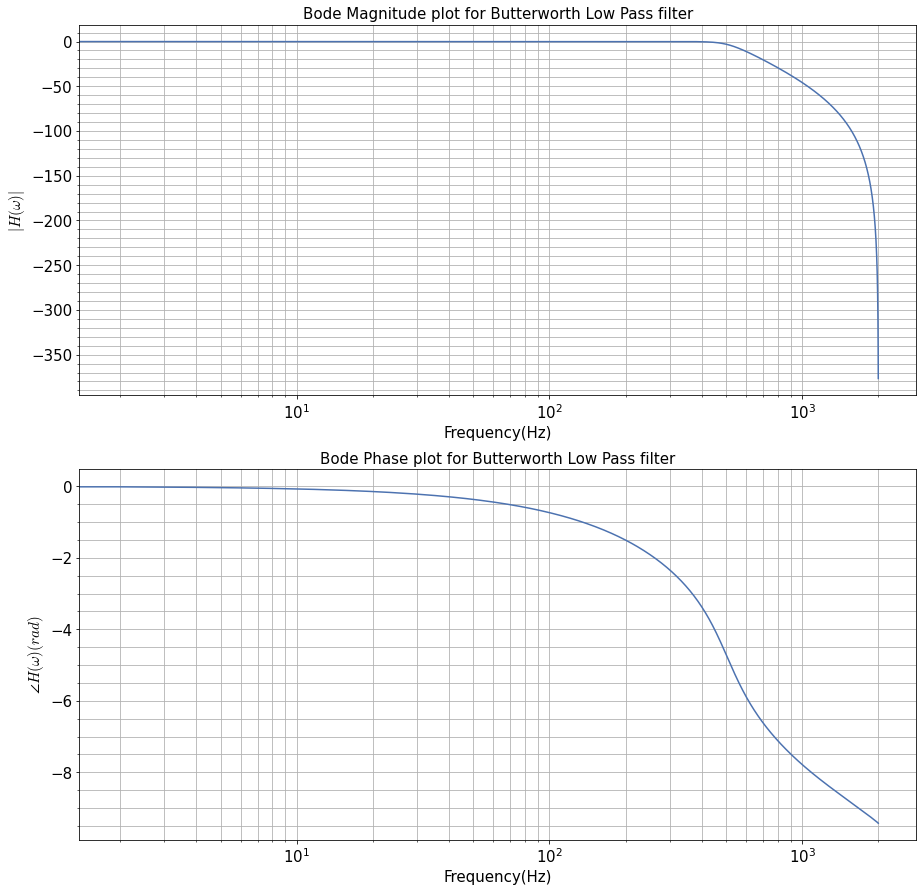

In [9]:
freq, mag = sp.freqz(num, den, 1024)
fig, axs = plt.subplots(2, figsize = (15,15))

plot_bode(freq,mag,title = "Bode Magnitude plot for Butterworth Low Pass filter", x_label = "Frequency(Hz)",y_label = r"$|H(\omega)|$",row = 0)
plot_bode(freq,mag,title = "Bode Phase plot for Butterworth Low Pass filter", x_label = "Frequency(Hz)",y_label = r"$\angle H(\omega) (rad)$",row = 1)

plt.savefig("Results/Bode_butter")

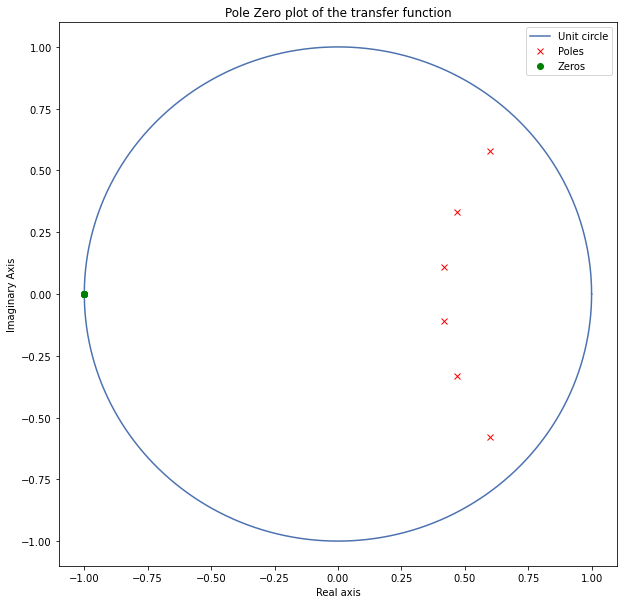

In [10]:
#Pole zero Plot
#zeros, poles, gain =sp.tf2zpk(num, denom)
z,p,k = sp.butter(N, Omega_c, btype='low', analog=True, output='zpk')
zeros,poles,gain =sp.bilinear_zpk(z,p,k, fs=Fs)
theta = np.arange(0,2*pi, 0.0001)

plt.figure(figsize = (10,10))
pole_zero_plot(poles, zeros)
plt.savefig("Results/polezero_butter")

<ipython-input-11-9c2bb813a1ed>:4: RuntimeWarning: invalid value encountered in true_divide
  plt.plot(freq, -np.unwrap(np.angle(mag))/freq)
C:\Users\rohan\anaconda3\lib\site-packages\scipy\signal\filter_design.py:689: UserWarning: The group delay is singular at frequencies [3.135, 3.139], setting to 0
  warnings.warn(


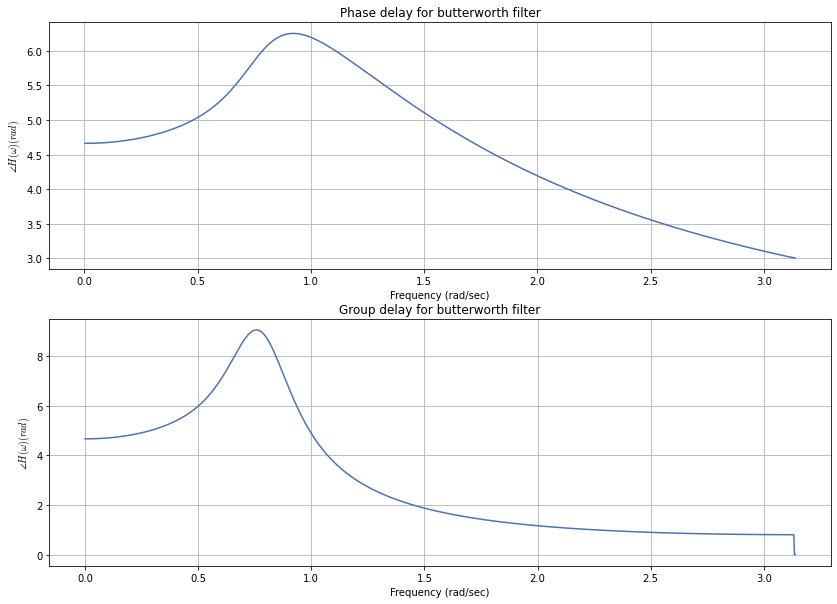

In [11]:
freq, mag = sp.freqz(num, den, 1024)
plt.figure(figsize = (14,10))
plt.subplot(2,1,1)
plt.plot(freq, -np.unwrap(np.angle(mag))/freq)
plt.xlabel("Frequency (rad/sec)")
plt.ylabel(r"$\angle H(\omega) (rad)$")
plt.title("Phase delay for butterworth filter")
plt.grid(True, which = 'both', ls='-')

plt.subplot(2,1,2)
w, gd_butter = sp.group_delay((num,den), 1024)
plt.plot(w, gd_butter)
plt.xlabel("Frequency (rad/sec)")
plt.ylabel(r"$\angle H(\omega) (rad)$")
plt.title('Group delay for butterworth filter')
plt.grid(True, which = 'both', ls='-')

plt.savefig("Results/pdgd_butter")

#### Chebyshev Type 1 filter

In [12]:
wp = 2*pi*500
ws = 2*pi*1000

Pg = 3
Ps = 40
Fs = 4000

G = 10**(-Pg/20)                       #Pg = 20*log(base10)(G)
S = 10**(-Ps/20)                       #Ps = 20*log(base10)(S)

omega_p=wp/Fs
omega_s=ws/Fs
Omega_p1=(2*Fs)*np.tan(omega_p/2)
Omega_s1=(2*Fs)*np.tan(omega_s/2)
print("Pre warped passband and stop band frequencies:{} rad/s and {} rad/s".format(Omega_p1,Omega_s1))

Pre warped passband and stop band frequencies:3313.7084989847604 rad/s and 7999.999999999999 rad/s


In [13]:
#ChebyshevType I
N, Omega_c=sp.cheb1ord(Omega_p1, Omega_s1, Pg, Ps, analog=True)
n, d = sp.cheby1(N, Pg, Omega_c, btype='low', analog=True, output='ba')
nums, dens=sp.bilinear(n, d, fs=Fs)
print("Order of the filter:",N)
print("Cut off frequency:",Omega_c)

Order of the filter: 4
Cut off frequency: 3313.7084989847604


In [14]:
print('H(z) = {}'.format(control.TransferFunction(n, d, dt=True)))

H(z) = 
                       1.511e+13
--------------------------------------------------------
z^4 + 1927 z^3 + 1.284e+07 z^2 + 1.473e+10 z + 2.134e+13



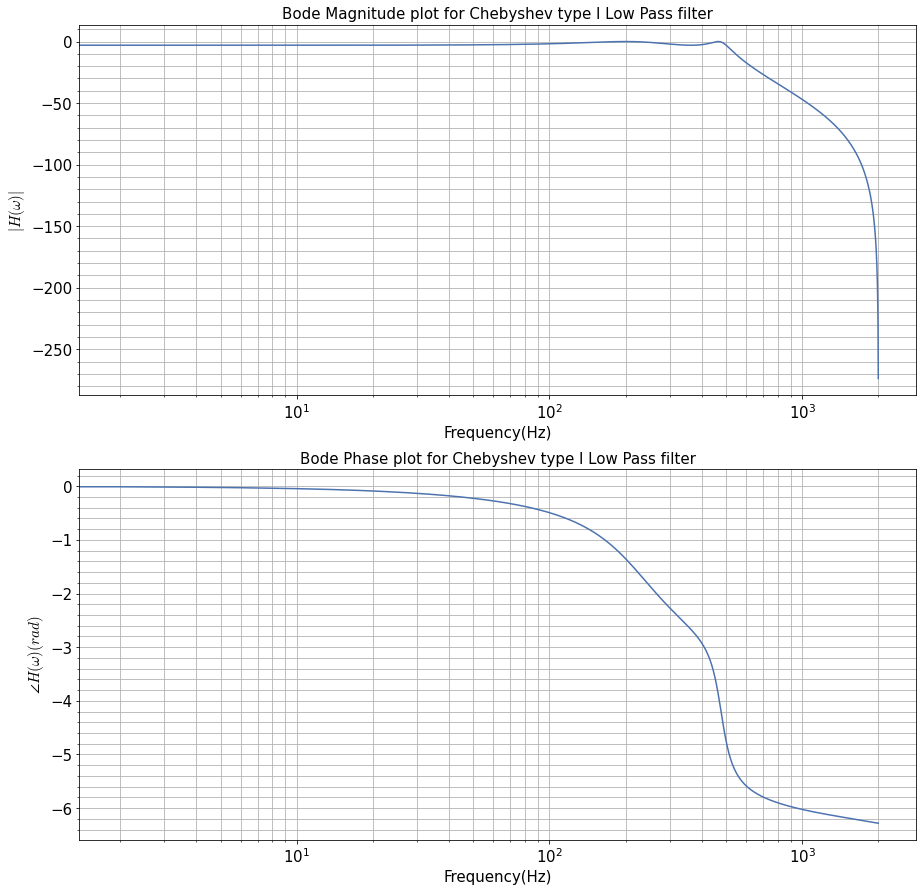

In [15]:
freq, mag = sp.freqz(nums, dens, 1024)
fig, axs = plt.subplots(2, figsize = (15,15))


plot_bode(freq,mag,title = "Bode Magnitude plot for Chebyshev type I Low Pass filter", x_label = "Frequency(Hz)",y_label = r"$|H(\omega)|$",row = 0)
plot_bode(freq,mag,title = "Bode Phase plot for Chebyshev type I Low Pass filter", x_label = "Frequency(Hz)",y_label = r"$\angle H(\omega) (rad)$",row = 1)

plt.savefig("Results/Bode_cheby")

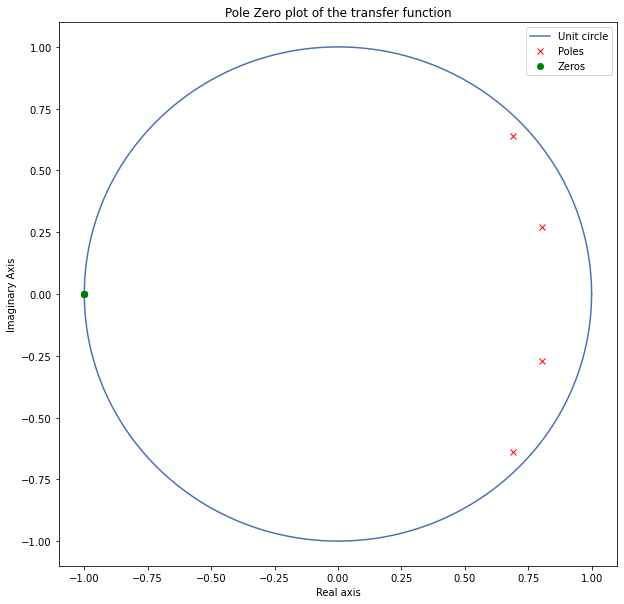

In [16]:
z,p,k = sp.cheby1(N, Pg,Omega_c, btype='low', analog=True, output='zpk')
zeros,poles,gain =sp.bilinear_zpk(z,p,k, fs=Fs)
theta = np.arange(0,2*pi, 0.0001)

plt.figure(figsize = (10,10))
pole_zero_plot(poles, zeros)
plt.savefig("Results/polezero_cheby")

<ipython-input-17-23c691a8c51b>:4: RuntimeWarning: invalid value encountered in true_divide
  plt.plot(freq, -np.unwrap(np.angle(mag))/freq)


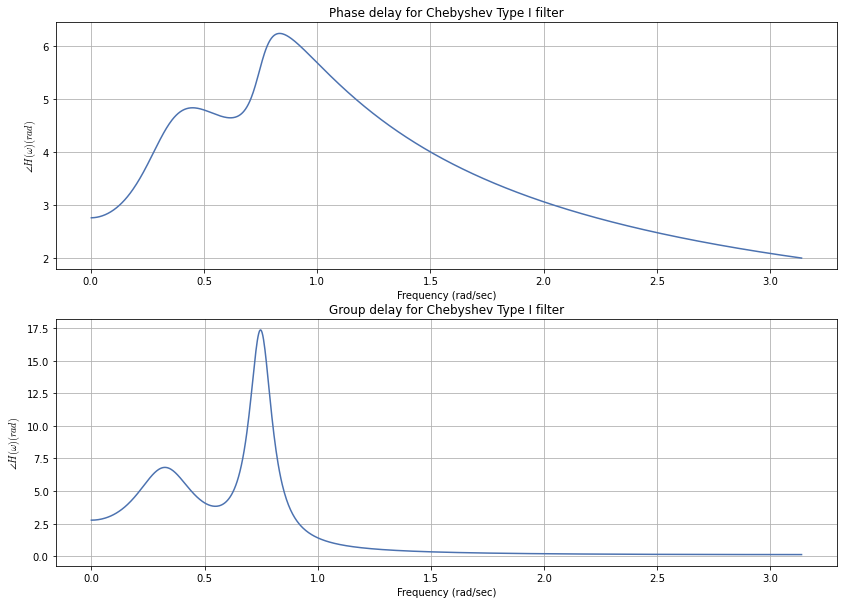

In [17]:
freq, mag = sp.freqz(nums, dens, 1024)
plt.figure(figsize = (14,10))
plt.subplot(2,1,1)
plt.plot(freq, -np.unwrap(np.angle(mag))/freq)
plt.xlabel("Frequency (rad/sec)")
plt.ylabel(r"$\angle H(\omega) (rad)$")
plt.title("Phase delay for Chebyshev Type I filter")
plt.grid(True, which = 'both', ls='-')

plt.subplot(2,1,2)
w, gd_cheby = sp.group_delay((nums,dens), 1024)
plt.plot(w, gd_cheby)
plt.xlabel("Frequency (rad/sec)")
plt.ylabel(r"$\angle H(\omega) (rad)$")
plt.title('Group delay for Chebyshev Type I filter')
plt.grid(True, which = 'both', ls='-')

plt.savefig("Results/pdgd_cheby")

#### Kaiser windowed FIR Filter

In [18]:
wp = 2*pi*500
ws = 2*pi*1000

Pg = 3
Ps = 40
Fs = 4000

G = 10**(-Pg/20)                       #Pg = 20*log(base10)(G)
S = 10**(-Ps/20)                       #Ps = 20*log(base10)(S)

omega_p=wp/Fs
omega_s=ws/Fs
Omega_p1=(2*Fs)*np.tan(omega_p/2)
Omega_s1=(2*Fs)*np.tan(omega_s/2)
print("Pre warped passband and stop band frequencies:{} rad/s and {} rad/s".format(Omega_p1,Omega_s1))

del_f = (ws - wp)/(2*pi*Fs)
beta = 0.5842 * (Ps - 21)**(0.4) + 0.07886*(Ps - 21)
M = np.ceil((Ps - 7.95)/(14.36 * del_f))
Fc = (ws + wp)/(4*pi)
print("Parameters: beta = {}, M = {} and Cut-off frequency : {} Hz.".format(beta,M,Fc))

Pre warped passband and stop band frequencies:3313.7084989847604 rad/s and 7999.999999999999 rad/s
Parameters: beta = 3.3953210522614574, M = 18.0 and Cut-off frequency : 750.0 Hz.


In [19]:
low_kaiser = sp.firwin(numtaps = M, cutoff = Fc, window=('kaiser',beta), pass_zero='lowpass', fs=Fs)

In [20]:
print('H(z) = {}'.format(control.TransferFunction(low_kaiser,1, dt=True)))

H(z) = 
-0.003061 z^17 + 0.006063 z^16 + 0.01842 z^15 + 0.005851 z^14 - 0.03836 z^13 - 0.05862 z^12 + 0.0218 z^11 + 0.198 z^10 + 0.35 z^9 + 0.35 z^8 + 0.198 z^7 + 0.0218 z^6 - 0.05862 z^5 - 0.03836 z^4 + 0.005851 z^3 + 0.01842 z^2 + 0.006063 z - 0.003061
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
                                                                                                                          1



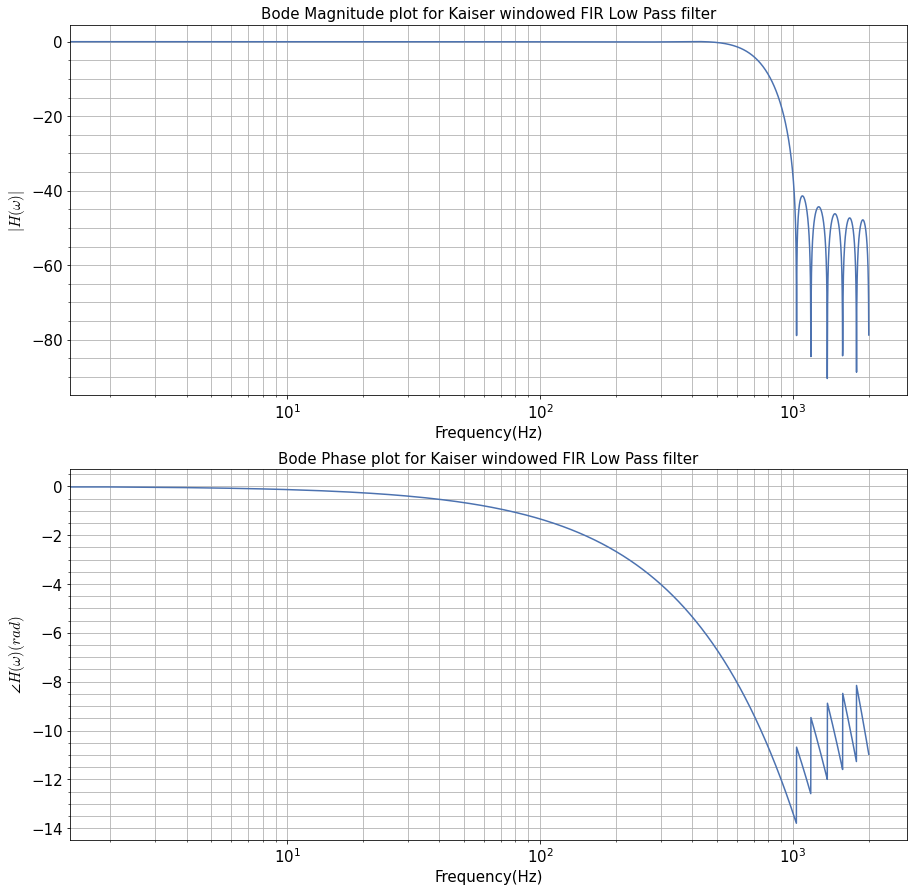

In [51]:
freq, mag = sp.freqz(low_kaiser, 1, 1024)
fig, axs = plt.subplots(2, figsize = (15,15))

plot_bode(freq,mag,title = "Bode Magnitude plot for Kaiser windowed FIR Low Pass filter", x_label = "Frequency(Hz)",y_label = r"$|H(\omega)|$",row = 0)
plot_bode(freq,mag,title = "Bode Phase plot for Kaiser windowed FIR Low Pass filter", x_label = "Frequency(Hz)",y_label = r"$\angle H(\omega) (rad)$",row = 1)

plt.savefig("Results/Bode_kaiser")

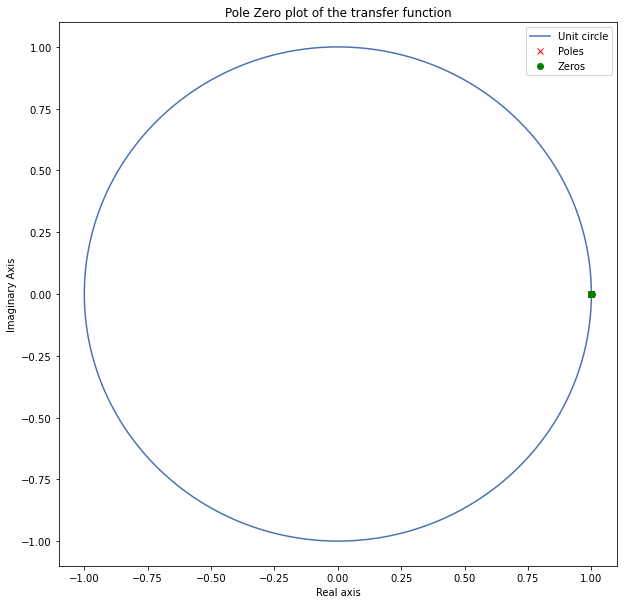

In [22]:
A = len(low_kaiser)
den_kaiser= np.hstack((np.array([1]),np.zeros(A - 1)))
z,p,k = sp.tf2zpk(low_kaiser, den_kaiser)
zeros,poles,gain =sp.bilinear_zpk(z,p,k, fs=Fs)
theta = np.arange(0,2*pi, 0.0001)

plt.figure(figsize = (10,10))
pole_zero_plot(poles, zeros)
plt.savefig("Results/polezero_kaiser")

<ipython-input-38-2971f726c6f6>:4: RuntimeWarning: invalid value encountered in true_divide
  plt.plot(freq, -np.unwrap(np.angle(mag))/freq)


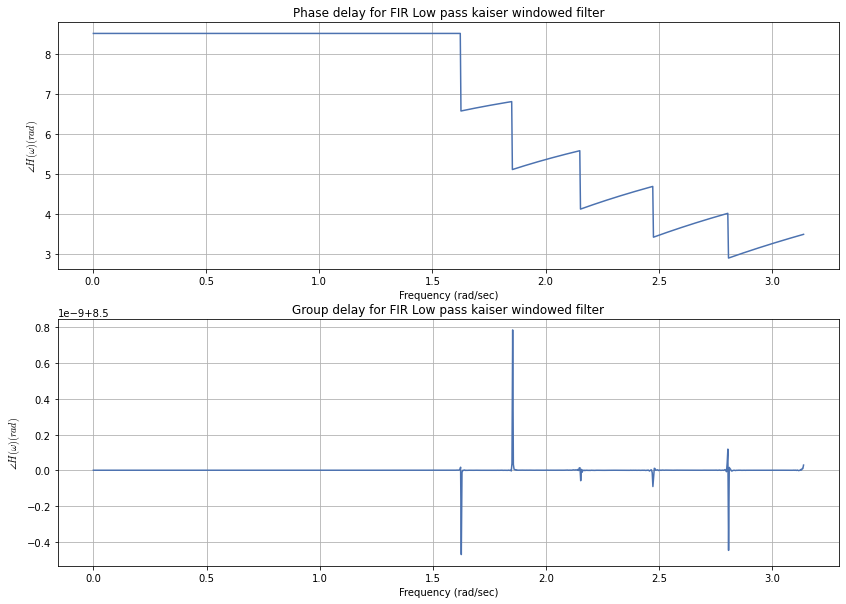

In [38]:
freq, mag = sp.freqz(low_kaiser,den_kaiser, 1024)
plt.figure(figsize = (14,10))
plt.subplot(2,1,1)
plt.plot(freq, -np.unwrap(np.angle(mag))/freq)
plt.xlabel("Frequency (rad/sec)")
plt.ylabel(r"$\angle H(\omega) (rad)$")
plt.title("Phase delay for FIR Low pass kaiser windowed filter")
plt.grid(True, which = 'both', ls='-')

plt.subplot(2,1,2)
w, gd_fir = sp.group_delay((low_kaiser,den_kaiser), 1024)
plt.plot(w, gd_fir)
plt.xlabel("Frequency (rad/sec)")
plt.ylabel(r"$\angle H(\omega) (rad)$")
plt.title('Group delay for FIR Low pass kaiser windowed filter')
plt.grid(True, which = 'both', ls='-')

plt.savefig("Results/gd_kaiser")

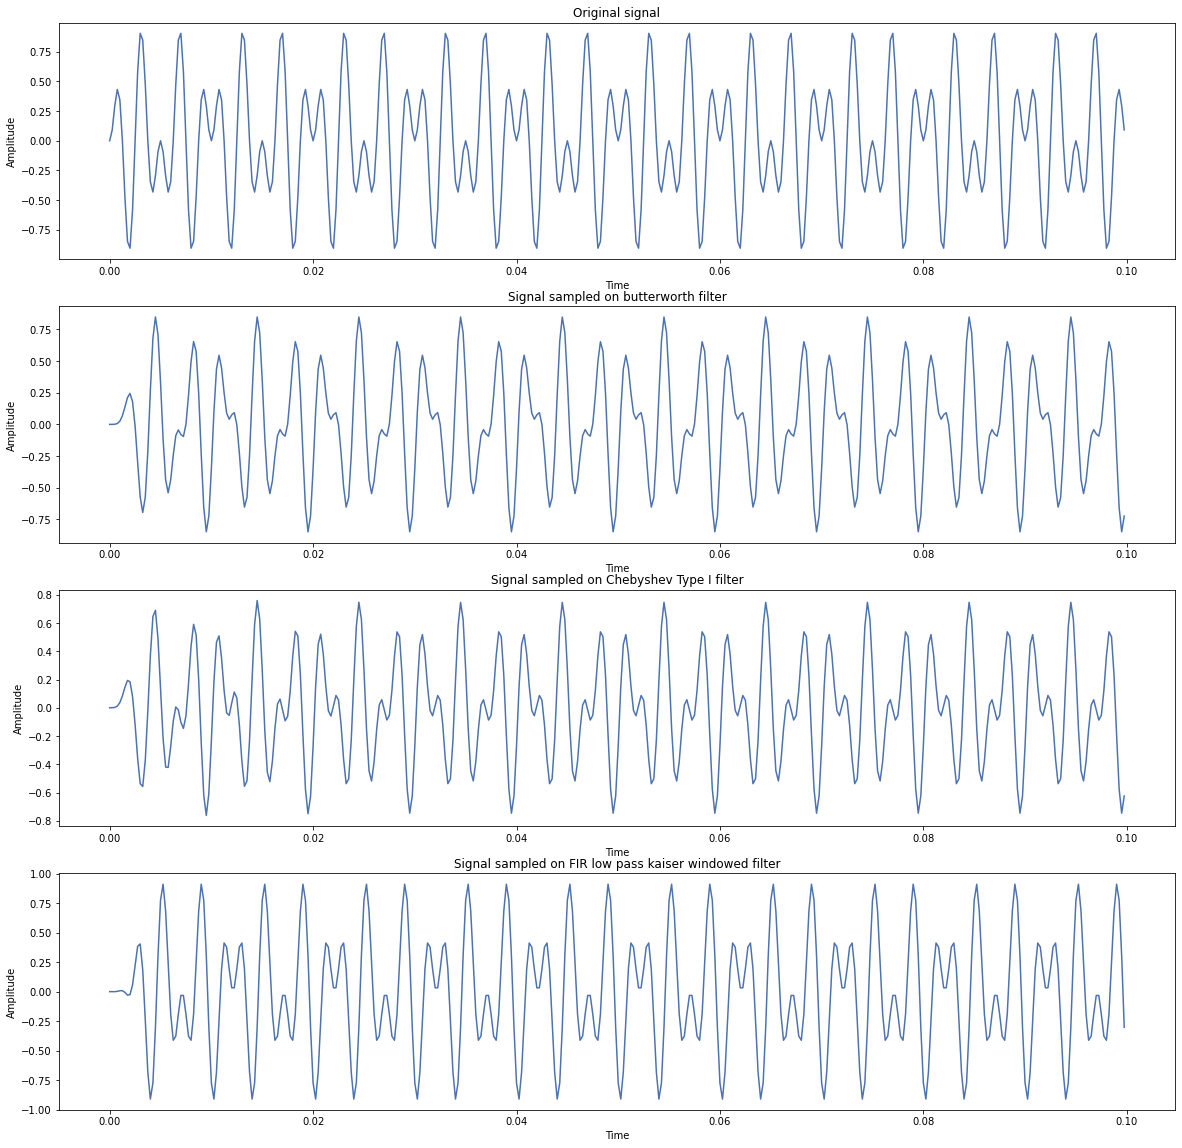

In [24]:
t = np.arange(0,0.1,1/Fs)
x = np.sin(2*pi*100*t) * np.sin(2*pi*400*t)
y1 =sp.lfilter(num, den, x)
y2 =sp.lfilter(nums, dens, x)
y3 =sp.lfilter(low_kaiser, den_kaiser, x)

plt.figure(figsize = (20,20))
plt.subplot(4,1,1)
plt.plot(t,x)
plt.title("Original signal")
plt.ylabel("Amplitude")
plt.xlabel("Time")

plt.subplot(4,1,2)
plt.plot(t,y1)
plt.title("Signal sampled on butterworth filter")
plt.ylabel("Amplitude")
plt.xlabel("Time")

plt.subplot(4,1,3)
plt.plot(t,y2)
plt.title("Signal sampled on Chebyshev Type I filter")
plt.ylabel("Amplitude")
plt.xlabel("Time")

plt.subplot(4,1,4)
plt.plot(t,y3)
plt.title("Signal sampled on FIR low pass kaiser windowed filter")
plt.ylabel("Amplitude")
plt.xlabel("Time")

plt.savefig("Results/linear_phase")

#### Part B


In [45]:
def fir_lattice(x,k):
    f_prev = x
    g_prev = x
    for i in k:
        f_next = f_prev + np.multiply(i,g_prev)
        g_next = g_prev + np.multiply(i,f_prev)
        
        f_prev = f_next
        g_prev = g_next
    
    y = f_next

    return y

In [46]:
def Reverse(lst):
    return [ele for ele in reversed(lst)]

In [47]:
def determine_k(H):
    K = []
    A_next = H
    k = H[len(H) - 1]

    K.append(k)
    
    for i in range(1,len(H)-1):
        B_next = Reverse(A_next)
        A_prev = (A_next - np.multiply(k,B_next))/(1 - k**2)
        
        A_prev = np.delete(A_prev,len(A_prev) - 1)
        k = A_prev[len(A_prev) - 1]
        K.append(k)
        
        A_next = A_prev  
        
    return Reverse(K)

In [48]:
t = np.arange(0, 0.025, 1/Fs)
step = np.ones(int(0.025*Fs))

In [49]:
H = low_kaiser
K = determine_k(H)
print(K)

[-0.8195080439420068, 0.11764216243837888, 0.34569741937911064, 0.31633423010508493, 0.2981518086865727, 0.3530113858213209, 0.42159967261113196, 0.4371046368497939, 0.3653056917960813, 0.20227620074908162, 0.023996175639622464, -0.05866417460329194, -0.03890004177644131, 0.005648943595542217, 0.018435769004816353, 0.006081186385873003, -0.003060966306836178]


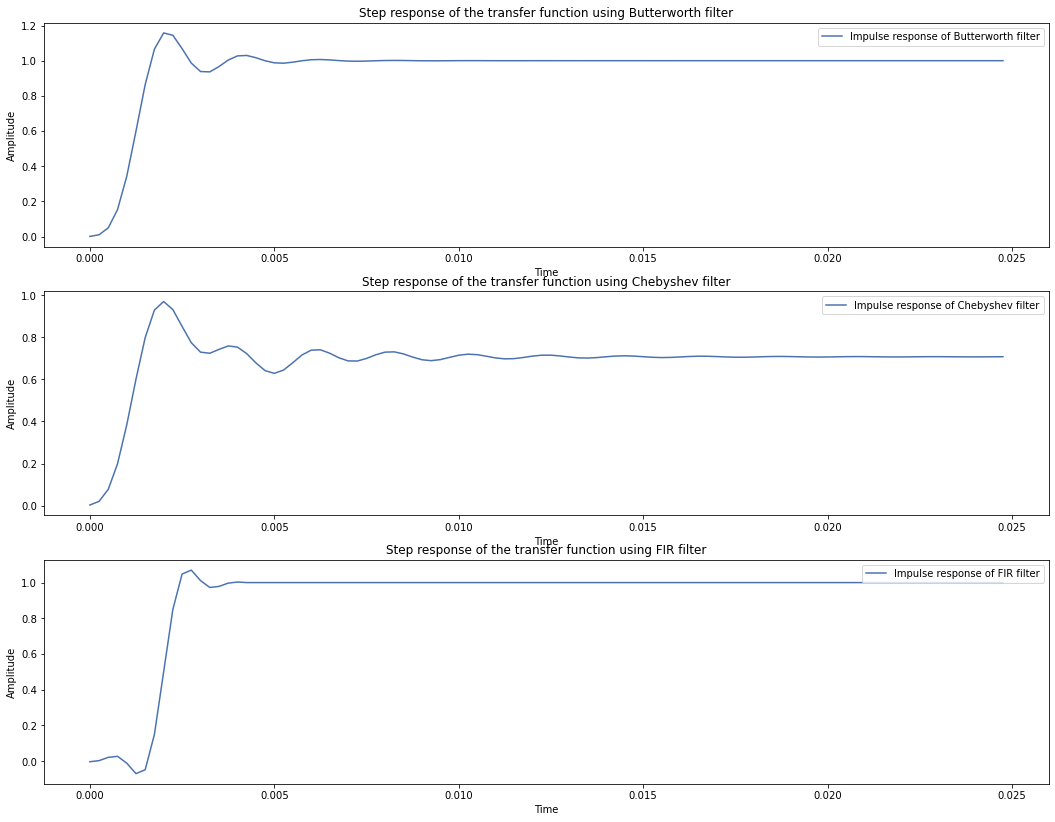

In [37]:
y_butt=sp.lfilter(num, den, step)
y_cheby=sp.lfilter(nums, dens, step)
y_fir = sp.lfilter(low_kaiser,den_kaiser,step)

plt.figure(figsize= (18,14))
plt.subplot(3,1,1)
plt.plot(t,y_butt,label = "Impulse response of Butterworth filter")
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.legend(loc = 'upper right')
plt.title("Step response of the transfer function using Butterworth filter")

plt.subplot(3,1,2)
plt.plot(t,y_cheby,label = "Impulse response of Chebyshev filter")
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.legend(loc = 'upper right')
plt.title("Step response of the transfer function using Chebyshev filter")

plt.subplot(3,1,3)
plt.plot(t,y_fir,label = "Impulse response of FIR filter")
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.legend(loc = 'upper right')
plt.title("Step response of the transfer function using FIR filter")

plt.savefig("Results/step_response")